* LogisticRegression & LinearSVC(Support Vector Machine) 분류 알고리즘

In [13]:
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import mglearn
import warnings
warnings.filterwarnings('ignore')
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['text.color'] = 'black'

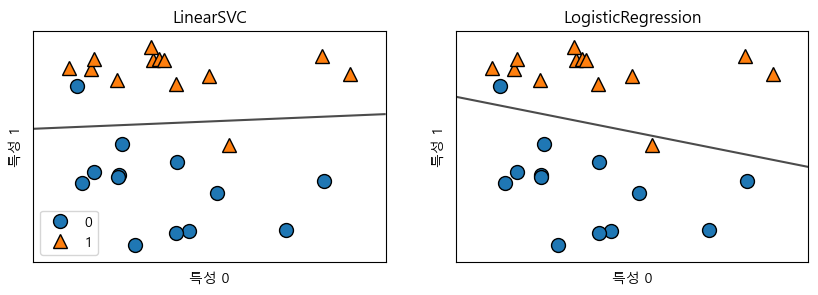

In [14]:
# 결정 경계 : xy평면도에 예측을 식으로 칠함
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    # 결정 경계 그리기
    mglearn.plots.plot_2d_separator(
        clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()
plt.show()


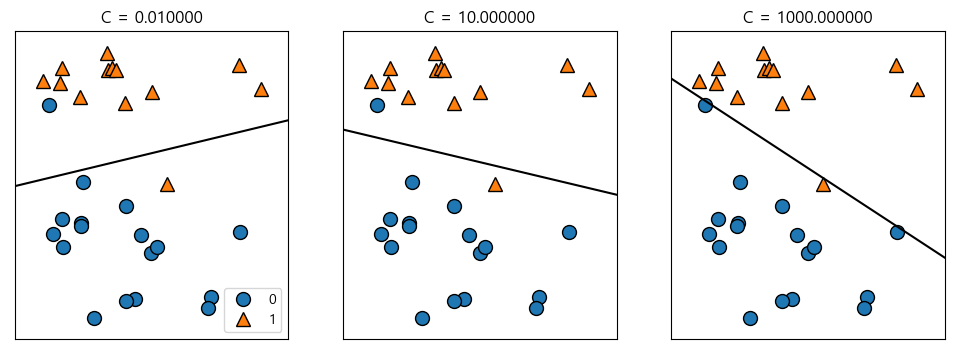

In [15]:
mglearn.plots.plot_linear_svc_regularization()
plt.show()

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))
# C: 규제감소(C값이 증가할수록 규제가 감소된다.) 기본값: 1

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [17]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))
# 훈련 세트 점수와 테스트 세트 점수가 비슷 즉 과소적합 따라서 규제를 감소시킴

훈련 세트 점수: 0.981
테스트 세트 점수: 0.972


In [18]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


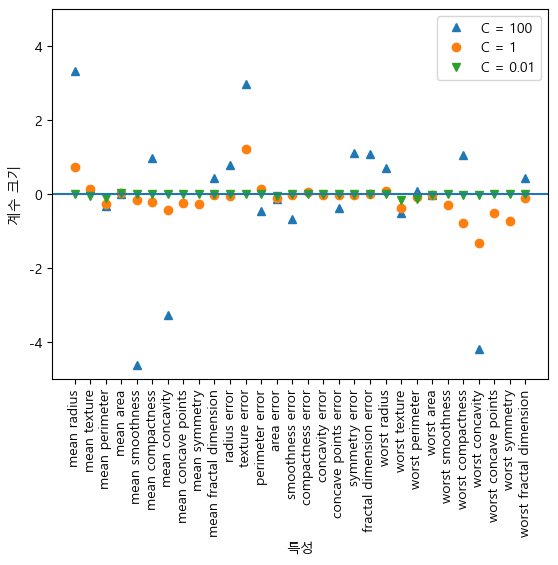

In [22]:
plt.plot(logreg100.coef_.T, '^', label="C = 100")
plt.plot(logreg.coef_.T, 'o', label="C = 1")
plt.plot(logreg001.coef_.T, 'v', label="C = 0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()
plt.show()